In [72]:
__file__ = 'rad_zu_ord_fit.ipynb'
import sys
import pathlib
sys.path.append(str(pathlib.Path(__file__).absolute().parent.parent)+"/FP2_lib")
import functions as f
import os
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from uncertainties import unumpy as up
from uncertainties import ufloat

In [73]:
with open('Data/Data.csv', mode='r') as tf:
    data = np.genfromtxt(tf,delimiter="\t",skip_header=1).T

In [74]:
slope = ufloat(41.7201052,0.17065753)
intercept = ufloat(-1.25029763,0.16276203)

In [75]:
dat1 = []
mag1 = []
dat2 = []
mag2 = []
amp1 = []
amp2 = []


for i in range(len(data[0])):
    if i%2 == 0:
        dat1.append(data[3][i])
        amp1.append(data[4][i])
    elif i%2 != 0:
        dat2.append(data[3][i])
        amp2.append(data[4][i])

  
        
for i in range(len(amp1)):
    amp1[i] = (amp1[i]*slope+intercept)
    amp2[i] = (amp2[i]*slope+intercept)



In [76]:
fillerr = np.full(len(dat1),1.5)
res1 = f.linear_fit(dat1,up.nominal_values(amp1),fillerr)
res2 = f.linear_fit(dat2,up.nominal_values(amp2),fillerr)

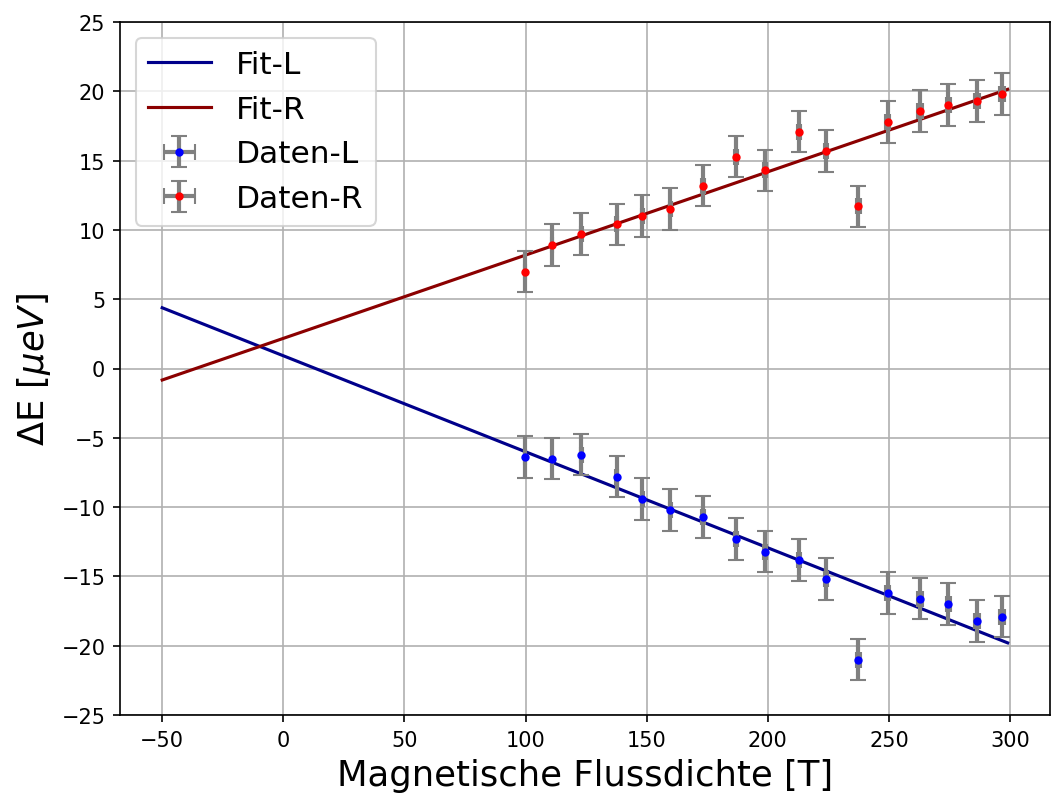

In [88]:
fig = plt.figure(figsize=(8,6),dpi=150,linewidth=50)

plt.plot(np.arange(-50,300,1),res1.eval(x=np.arange(-50,300,1)),color='darkblue',linestyle='-',alpha=1,label="Fit-L")
plt.plot(np.arange(-50,300,1),res2.eval(x=np.arange(-50,300,1)),color='darkred',linestyle='-',alpha=1,label="Fit-R")


plt.errorbar(up.nominal_values(amp1),dat1,xerr=up.std_devs(amp1),yerr = fillerr,fmt='b.',ecolor='gray', elinewidth=2, capsize=4,label = 'Daten-L')
plt.errorbar(up.nominal_values(amp2),dat2,xerr=up.std_devs(amp2),yerr = fillerr,fmt='r.',ecolor='gray', elinewidth=2, capsize=4,label = 'Daten-R')







plt.yticks(np.arange(-25,30,5))
plt.ylabel('$\Delta$E [$\mu eV$]',fontsize = 17)
plt.xlabel('Magnetische Flussdichte [T]',fontsize = 17)
plt.grid()
plt.legend(fontsize = 15)
plt.savefig('Res/borsch_mag.pdf')

In [78]:
print(res1.fit_report())


[[Model]]
    Model(linear)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 4
    # data points      = 17
    # variables        = 2
    chi-square         = 17.2208100
    reduced chi-square = 1.14805400
    Akaike info crit   = 4.21938831
    Bayesian info crit = 5.88581500
    R-squared          = 0.95009924
[[Variables]]
    slope:     -0.06928017 +/- 0.00636164 (9.18%) (init = -0.06928017)
    intercept:  0.92496005 +/- 1.32436044 (143.18%) (init = 0.92496)
[[Correlations]] (unreported correlations are < 0.100)
    C(slope, intercept) = -0.956


In [79]:
print(res2.fit_report())

[[Model]]
    Model(linear)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 4
    # data points      = 17
    # variables        = 2
    chi-square         = 14.8725996
    reduced chi-square = 0.99150664
    Akaike info crit   = 1.72722284
    Bayesian info crit = 3.39364953
    R-squared          = 0.94365134
[[Variables]]
    slope:      0.06009098 +/- 0.00591202 (9.84%) (init = 0.06009098)
    intercept:  2.17976568 +/- 1.23075851 (56.46%) (init = 2.179766)
[[Correlations]] (unreported correlations are < 0.100)
    C(slope, intercept) = -0.956
